In [5]:
# импорт бибилотек
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
import time
from sklearn.linear_model import ElasticNetCV

Выгружаю датасеты

In [6]:
# Каталог из которого беру файлы
directory = 'D:\Диск\Desktop\Датасеты для курсовой\Commodity Data'

# список файлов в переменную files
files = os.listdir(directory)

# прочитать файл по фондовым индексам
all_df = pd.read_csv(r'D:\Диск\Desktop\Курсач\ДатаСеты\Index closing price from 1994 to 2021.csv', sep=',')
all_df['date_ok'] = pd.to_datetime(all_df['Date'], format='%Y-%m-%d')
all_df = all_df.drop('Date', axis=1)

In [7]:
#типы данных
all_df.dtypes

spx               float64
dax               float64
ftse              float64
nikkei            float64
date_ok    datetime64[ns]
dtype: object

In [8]:
# количество строк в файлах
for i in range(len(files)):
    name = str(files[i])[0:-4]
    name_column = name
    name = pd.read_csv(f'D:\Диск\Desktop\Датасеты для курсовой\Commodity Data\\{files[i]}')
    print(name_column, name.shape)

Cocoa (5463, 7)
Coffee (5463, 7)
Copper (5291, 7)
Corn (5323, 7)
Cotton (5463, 7)
Crude Oil (5296, 7)
Feeder Cattle (4898, 7)
Gold (5291, 7)
Heating Oil (5289, 7)
Lean Hogs (4898, 7)
Live Cattle (4898, 7)
Lumber (5323, 7)
Natural Gas (5291, 7)
Oat (5463, 7)
Palladium (5462, 7)
Platinum (5462, 7)
RBOB Gasoline (5246, 7)
Silver (5291, 7)
Soybean Meal (5368, 7)
Soybean Oil (5411, 7)
Soybean (5279, 7)
Sugar (5421, 7)
Wheat (5275, 7)


In [9]:
# Чтение циклом и обработка всех файлов
# Объединение в один датафрейм
for i in range(len(files)):
    name = str(files[i])[0:-4]
    name_column = name
    name = pd.read_csv(f'D:\Диск\Desktop\Датасеты для курсовой\Commodity Data\\{files[i]}')
    name['date_ok'] = pd.to_datetime(name['Date'], format='%Y-%m-%d')
    name = name.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
    name.columns=[f'{name_column}', 'date_ok']
    all_df = all_df.merge(name, on='date_ok', how='left')
    
all_df = all_df.dropna()
display(all_df.head())

spx          dax         ftse        nikkei    date_ok   Cocoa  \
2142  1138.489990  5390.589844  5195.500000  11207.919922 2002-03-26  1470.0   
2143  1144.579956  5348.000000  5214.700195  11323.679688 2002-03-27  1504.0   
2144  1147.390015  5397.290039  5271.799805  11333.110352 2002-03-28  1494.0   
2146  1146.540039  5397.290039  5271.799805  11028.700195 2002-04-01  1504.0   
2148  1125.400024  5281.839844  5247.799805  11400.709961 2002-04-03  1479.0   

         Coffee  Copper   Corn     Cotton  ...     Oat   Palladium  \
2142  55.049999  0.7415  205.0  38.160000  ...  202.75  392.200012   
2143  55.950001  0.7480  204.5  39.389999  ...  201.00  388.500000   
2144  57.200001  0.7605  207.0  38.160000  ...  199.00  388.899994   
2146  58.500000  0.7610  202.5  38.410000  ...  199.00  390.649994   
2148  59.450001  0.7400  204.0  38.200001  ...  206.25  370.250000   

        Platinum  RBOB Gasoline  Silver  Soybean Meal  Soybean Oil  Soybean  \
2142  515.000000         0.8020   4.579    160.199997    16.049999   463.75   
2143  515.000000         0.8155   4.671    162.000000    16.020000   468.75   
2144  515.700012         0.8280   4.641    162.500000    16.139999   473.50   
2146  517.700012         0.8480   4.691    160.100006    16.459999   474.25   
2148  527.000000         0.8490   4.658    159.500000    16.480000   472.00   

      Sugar  Wheat  
2142   6.08  287.0  
2143   6.00  293.0  
2144   5.93  290.0  
2146   5.77  296.0  
2148   5.66  297.5  

[5 rows x 28 columns]

In [10]:
# Проверка корелляции в датасете
all_df.corr()

spx       dax      ftse    nikkei     Cocoa    Coffee  \
spx            1.000000  0.936146  0.764974  0.952091  0.208649 -0.053788   
dax            0.936146  1.000000  0.908515  0.911270  0.376284  0.116168   
ftse           0.764974  0.908515  1.000000  0.764760  0.350125  0.244245   
nikkei         0.952091  0.911270  0.764760  1.000000  0.135165 -0.180908   
Cocoa          0.208649  0.376284  0.350125  0.135165  1.000000  0.581040   
Coffee        -0.053788  0.116168  0.244245 -0.180908  0.581040  1.000000   
Copper         0.308998  0.442005  0.545073  0.207093  0.530115  0.748619   
Corn           0.042069  0.155380  0.233871 -0.133168  0.454960  0.728288   
Cotton         0.009010  0.129099  0.234052 -0.102918  0.467091  0.765599   
Crude Oil     -0.148722  0.002568  0.248744 -0.236017  0.388176  0.687026   
Feeder Cattle  0.426611  0.597285  0.645017  0.419734  0.551178  0.402448   
Gold           0.596452  0.672263  0.620051  0.410189  0.578187  0.595793   
Heating Oil   -0.048775  0.113908  0.353660 -0.149250  0.410777  0.709260   
Lean Hogs      0.026610  0.128653  0.268738 -0.067926  0.369837  0.596304   
Live Cattle    0.412872  0.598102  0.659047  0.374516  0.586906  0.483662   
Lumber         0.697364  0.537056  0.344795  0.651975 -0.069700 -0.111543   
Natural Gas   -0.556867 -0.621116 -0.499004 -0.447020 -0.399642 -0.135568   
Oat            0.276792  0.373417  0.438186  0.128088  0.519556  0.631280   
Palladium      0.895127  0.776307  0.563500  0.772205  0.253862  0.068602   
Platinum      -0.224327 -0.058444  0.117627 -0.327668  0.526083  0.803482   
RBOB Gasoline -0.092900  0.073381  0.313301 -0.183913  0.392621  0.705028   
Silver         0.187939  0.302454  0.354023  0.002623  0.536127  0.825421   
Soybean Meal   0.336646  0.472254  0.521410  0.200814  0.564136  0.539171   
Soybean Oil    0.011708  0.123580  0.198034 -0.142876  0.467433  0.771575   
Soybean        0.161269  0.293433  0.360456  0.003170  0.535888  0.680984   
Sugar         -0.040896  0.126859  0.258254 -0.168804  0.571591  0.858238   
Wheat         -0.087686  0.049034  0.166537 -0.211564  0.500439  0.724576   

                 Copper      Corn    Cotton  Crude Oil  ...       Oat  \
spx            0.308998  0.042069  0.009010  -0.148722  ...  0.276792   
dax            0.442005  0.155380  0.129099   0.002568  ...  0.373417   
ftse           0.545073  0.233871  0.234052   0.248744  ...  0.438186   
nikkei         0.207093 -0.133168 -0.102918  -0.236017  ...  0.128088   
Cocoa          0.530115  0.454960  0.467091   0.388176  ...  0.519556   
Coffee         0.748619  0.728288  0.765599   0.687026  ...  0.631280   
Copper         1.000000  0.779022  0.681399   0.767501  ...  0.799729   
Corn           0.779022  1.000000  0.678292   0.723992  ...  0.811563   
Cotton         0.681399  0.678292  1.000000   0.599571  ...  0.588268   
Crude Oil      0.767501  0.723992  0.599571   1.000000  ...  0.728466   
Feeder Cattle  0.441555  0.282918  0.150878   0.337161  ...  0.464242   
Gold           0.798516  0.712591  0.486447   0.454259  ...  0.741335   
Heating Oil    0.803458  0.782448  0.595021   0.972698  ...  0.779896   
Lean Hogs      0.579474  0.558372  0.445477   0.705394  ...  0.608941   
Live Cattle    0.524140  0.434259  0.268917   0.411686  ...  0.570506   
Lumber         0.230067  0.064505  0.013546  -0.099951  ...  0.177802   
Natural Gas   -0.239664 -0.261377 -0.141298   0.124163  ... -0.266786   
Oat            0.799729  0.811563  0.588268   0.728466  ...  1.000000   
Palladium      0.414886  0.221631  0.140555  -0.042654  ...  0.438082   
Platinum       0.806287  0.785443  0.669575   0.876748  ...  0.698297   
RBOB Gasoline  0.791058  0.777782  0.603689   0.969017  ...  0.736008   
Silver         0.865561  0.898423  0.722390   0.692499  ...  0.773092   
Soybean Meal   0.715508  0.769726  0.476453   0.647070  ...  0.815661   
Soybean Oil    0.828664  0.931402  0.721822   0.771211  ...  0.780403   
Soybean        0.794414  0.908812  0.6

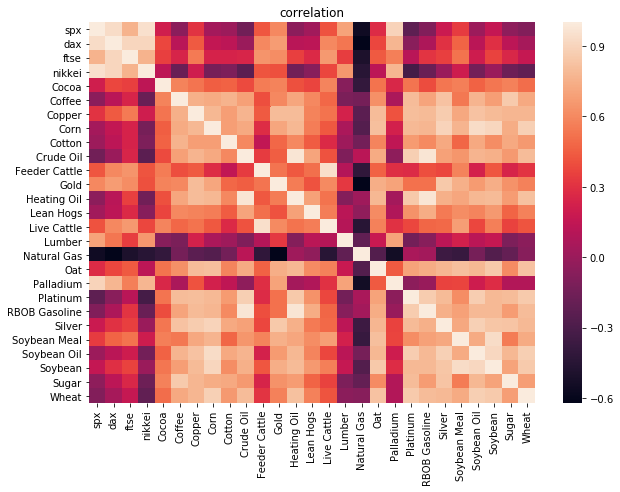

In [11]:
plt.figure(figsize=(10, 7))  #Это опраделяет размер графика
heatmap = sns.heatmap(all_df.corr())
heatmap.set_title('correlation')
plt.show()

In [12]:
#вывод объединенной информации по датасету
all_df.shape

(3795, 28)

In [13]:
all_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3795 entries, 2142 to 7153
Data columns (total 28 columns):
spx              3795 non-null float64
dax              3795 non-null float64
ftse             3795 non-null float64
nikkei           3795 non-null float64
date_ok          3795 non-null datetime64[ns]
Cocoa            3795 non-null float64
Coffee           3795 non-null float64
Copper           3795 non-null float64
Corn             3795 non-null float64
Cotton           3795 non-null float64
Crude Oil        3795 non-null float64
Feeder Cattle    3795 non-null float64
Gold             3795 non-null float64
Heating Oil      3795 non-null float64
Lean Hogs        3795 non-null float64
Live Cattle      3795 non-null float64
Lumber           3795 non-null float64
Natural Gas      3795 non-null float64
Oat              3795 non-null float64
Palladium        3795 non-null float64
Platinum         3795 non-null float64
RBOB Gasoline    3795 non-null float64
Silver           3795 non

In [14]:
#поиск нулевых занчений в датасете
all_df.isna().sum()

spx              0
dax              0
ftse             0
nikkei           0
date_ok          0
Cocoa            0
Coffee           0
Copper           0
Corn             0
Cotton           0
Crude Oil        0
Feeder Cattle    0
Gold             0
Heating Oil      0
Lean Hogs        0
Live Cattle      0
Lumber           0
Natural Gas      0
Oat              0
Palladium        0
Platinum         0
RBOB Gasoline    0
Silver           0
Soybean Meal     0
Soybean Oil      0
Soybean          0
Sugar            0
Wheat            0
dtype: int64

In [15]:
#информация по датасету
all_df.duplicated()

2142    False
2143    False
2144    False
2146    False
2148    False
2150    False
2152    False
2153    False
2154    False
2155    False
2156    False
2157    False
2158    False
2159    False
2160    False
2161    False
2162    False
2163    False
2164    False
2165    False
2166    False
2167    False
2168    False
2169    False
2170    False
2171    False
2172    False
2173    False
2174    False
2175    False
        ...  
7111    False
7112    False
7113    False
7114    False
7115    False
7116    False
7117    False
7118    False
7119    False
7120    False
7121    False
7122    False
7123    False
7126    False
7127    False
7128    False
7129    False
7130    False
7131    False
7132    False
7133    False
7134    False
7135    False
7147    False
7148    False
7149    False
7150    False
7151    False
7152    False
7153    False
Length: 3795, dtype: bool

Именно пшеница коррелирует сильнее всего с отсальными параметрами (видно из таблицы). Выведу отдельно с какими параметрами у нее высокая корреляция и построю графики. 

Поэтому оставлю только те данные, у которых высокая корреляция с пшеницей

In [16]:
all_df = all_df[['Wheat', 'Corn', 'Crude Oil', 'Heating Oil', 'Oat', 'Platinum', 'RBOB Gasoline', 'Soybean Oil', 'Soybean']]

In [17]:
all_df.corr()

Wheat      Corn  Crude Oil  Heating Oil       Oat  Platinum  \
Wheat          1.000000  0.880827   0.801606     0.818853  0.822782  0.859144   
Corn           0.880827  1.000000   0.723992     0.782448  0.811563  0.785443   
Crude Oil      0.801606  0.723992   1.000000     0.972698  0.728466  0.876748   
Heating Oil    0.818853  0.782448   0.972698     1.000000  0.779896  0.850547   
Oat            0.822782  0.811563   0.728466     0.779896  1.000000  0.698297   
Platinum       0.859144  0.785443   0.876748     0.850547  0.698297  1.000000   
RBOB Gasoline  0.799284  0.777782   0.969017     0.972555  0.736008  0.861874   
Soybean Oil    0.874085  0.931402   0.771211     0.784357  0.780403  0.871011   
Soybean        0.856751  0.908812   0.752551     0.792569  0.853232  0.787246   

               RBOB Gasoline  Soybean Oil   Soybean  
Wheat               0.799284     0.874085  0.856751  
Corn                0.777782     0.931402  0.908812  
Crude Oil           0.969017     0.771211  0.752551  
Heating Oil         0.972555     0.784357  0.792569  
Oat                 0.736008     0.780403  0.853232  
Platinum            0.861874     0.871011  0.787246  
RBOB Gasoline       1.000000     0.790404  0.790015  
Soybean Oil         0.790404     1.000000  0.913713  
Soybean             0.790015     0.913713  1.000000

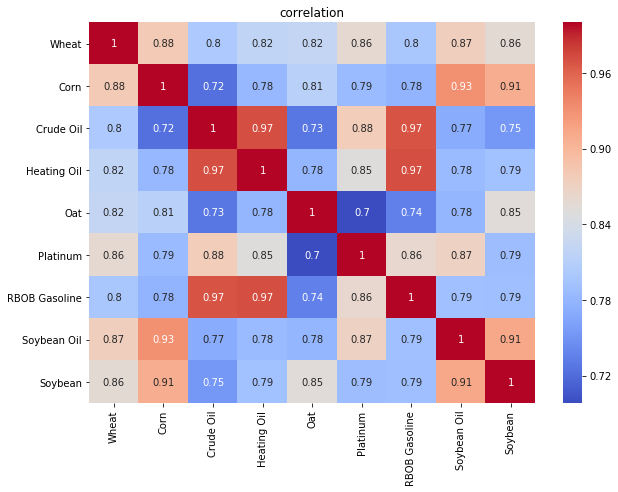

In [18]:
plt.figure(figsize=(10, 7))  #Это опраделяет размер графика
heatmap = sns.heatmap(all_df.corr(), annot = True, cmap= 'coolwarm')
heatmap.set_title('correlation')
plt.show()

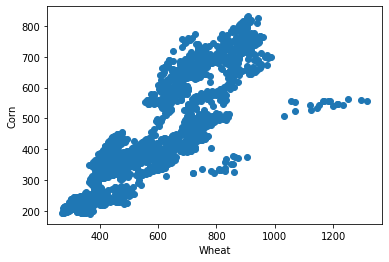

In [19]:
x = all_df['Wheat']
y = all_df['Corn']
plt.figure()
plt.scatter(x, y)
plt.xlabel('Wheat')
plt.ylabel('Corn')
plt.show()

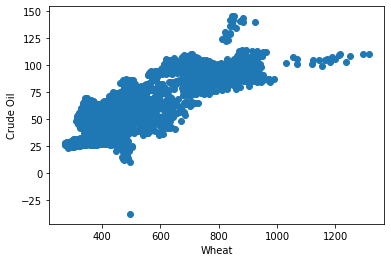

In [20]:
x = all_df['Wheat']
y = all_df['Crude Oil']
plt.figure()
plt.scatter(x, y)
plt.xlabel('Wheat')
plt.ylabel('Crude Oil')
plt.show()

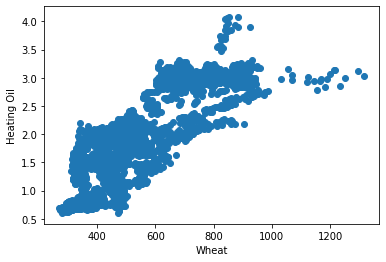

In [21]:
x = all_df['Wheat']
y = all_df['Heating Oil']
plt.figure()
plt.scatter(x, y)
plt.xlabel('Wheat')
plt.ylabel('Heating Oil')
plt.show()

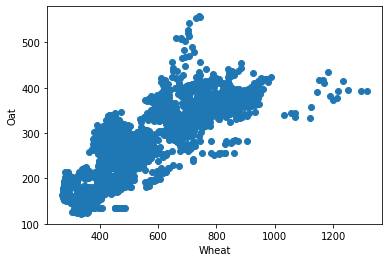

In [22]:
x = all_df['Wheat']
y = all_df['Oat']
plt.figure()
plt.scatter(x, y)
plt.xlabel('Wheat')
plt.ylabel('Oat')
plt.show()

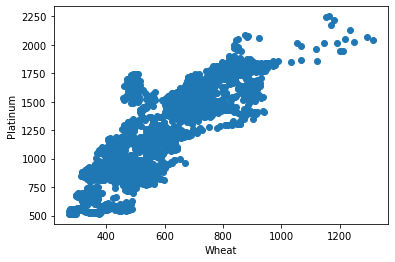

In [23]:
x = all_df['Wheat']
y = all_df['Platinum']
plt.figure()
plt.scatter(x, y)
plt.xlabel('Wheat')
plt.ylabel('Platinum')
plt.show()

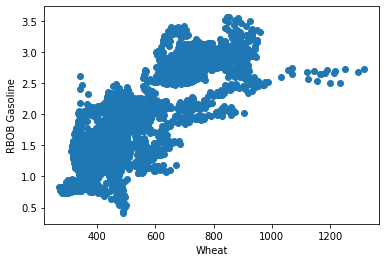

In [24]:
x = all_df['Wheat']
y = all_df['RBOB Gasoline']
plt.figure()
plt.scatter(x, y)
plt.xlabel('Wheat')
plt.ylabel('RBOB Gasoline')
plt.show()

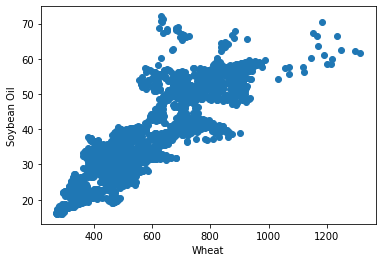

In [25]:
x = all_df['Wheat']
y = all_df['Soybean Oil']
plt.figure()
plt.scatter(x, y)
plt.xlabel('Wheat')
plt.ylabel('Soybean Oil')
plt.show()

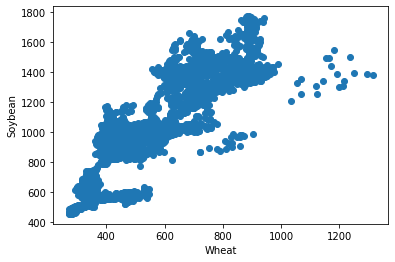

In [26]:
x = all_df['Wheat']
y = all_df['Soybean']
plt.figure()
plt.scatter(x, y)
plt.xlabel('Wheat')
plt.ylabel('Soybean')
plt.show()

Обучение моделей

Линейная функция. 

In [27]:
#прогнощируем пшеницу от всего остального
y_1 = all_df['Wheat']
x_1 = all_df.drop(columns = ['Wheat'],axis = 1)

In [28]:
#возьму 20% тестовых значений для проверки модели и 80% данных, на которых обучу модель
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1, y_1, test_size=0.2, random_state=12345)

In [29]:
start_time = time.time()
model_1 = LinearRegression().fit(x_1_train,y_1_train) #создание модели
y_1_pred = model_1.predict(x_1_test)
#точность модели на всей выборке 
print(model_1.score(x_1,y_1))
#точность модели на тестовой выборке
print(model_1.score(x_1_test,y_1_test))
tm = time.time()-start_time
print("Время выполнения", tm)
MSE = mean_squared_error(y_1_test, y_1_pred)
print("Среднеквадратичная ошибка (MSE):", MSE)

0.8779701917123602
0.8743702229332275
Время выполнения 0.059853315353393555
Среднеквадратичная ошибка (MSE): 3602.510399681316


In [30]:
best_model_reg = model_1
best_result_reg = model_1.score(x_1_test,y_1_test)
best_mse_reg = MSE
best_time_reg = tm

In [31]:
a_1 = model_1.intercept_ # свободный член
b_1 = model_1.coef_ # коэффициент регрессии
print ("Свободный член", a_1, ", коэффициент регрессии:", b_1)

Свободный член 33.986118125061466 , коэффициент регрессии: [ 5.91017838e-01  2.86680411e+00 -5.43402486e+00  4.20052284e-01
  2.00412332e-01 -1.00256598e+02 -2.81646114e+00  4.22220364e-02]


0.9725256839273533  coef
142.98183841831906  свободный член
0.7883344094702982  r^2


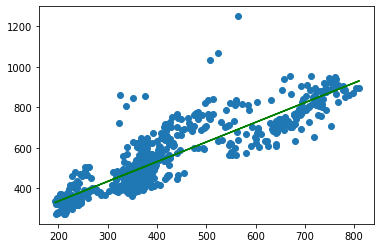

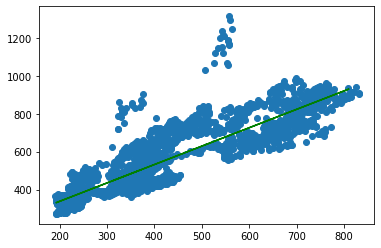

5.527682495248958  coef
187.98306047832324  свободный член
0.6397171003040213  r^2


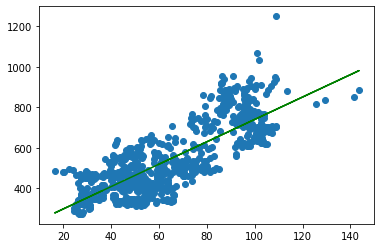

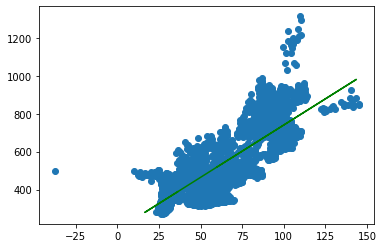

185.70630813360617  coef
178.77318742926656  свободный член
0.6644780035333797  r^2


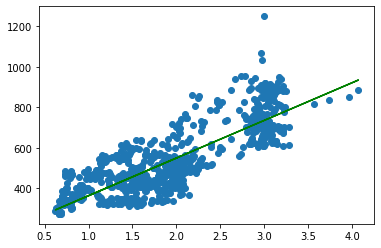

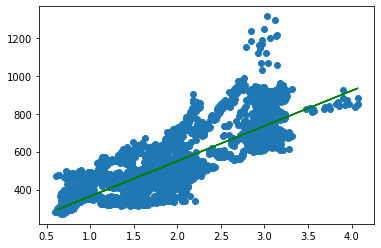

1.7302350933166875  coef
75.384383194804  свободный член
0.6742431154115557  r^2


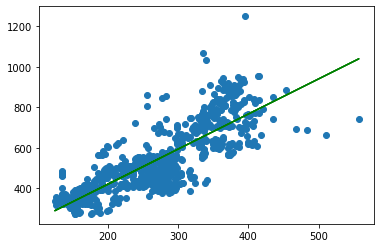

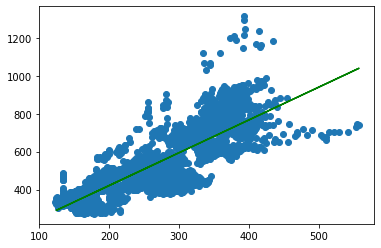

0.4118148028214229  coef
75.6452510443408  свободный член
0.7248725521903812  r^2


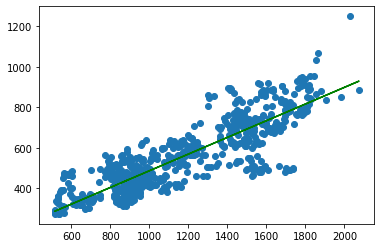

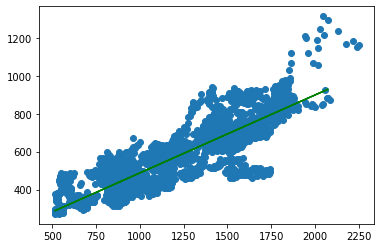

193.99078226411325  coef
174.05834599950686  свободный член
0.6413433421168593  r^2


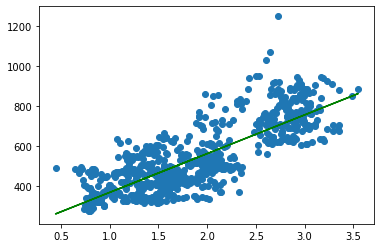

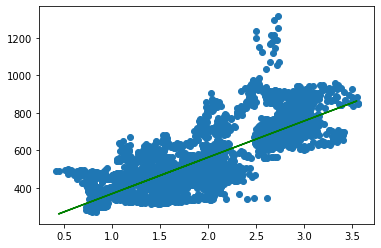

13.157016133067595  coef
76.19792712467688  свободный член
0.7641315586772218  r^2


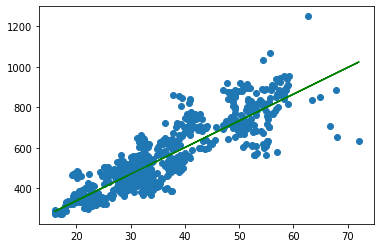

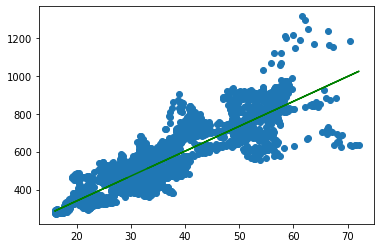

0.4880255551433199  coef
49.33179471921363  свободный член
0.740609145973184  r^2


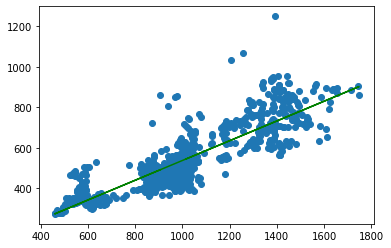

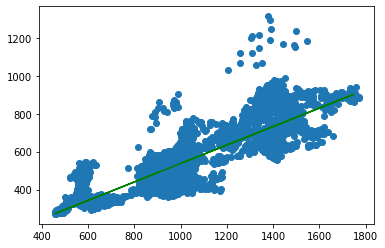

In [32]:
for i in ('Corn', 'Crude Oil', 'Heating Oil', 'Oat', 'Platinum', 'RBOB Gasoline', 'Soybean Oil', 'Soybean'):
    model1 = LinearRegression().fit(x_1_train[i].to_numpy().reshape((-1, 1)), y_1_train.values)
    print(model1.coef_[0], ' coef')
    print(model1.intercept_, ' свободный член')
    # значение метрики эффективности
    print(model1.score(x_1_test[i].to_numpy().reshape((-1, 1)), y_1_test.values), ' r^2') 
    
    
        #график
    plt.figure()
    plt.scatter(x_1_test[i], y_1_test) #данные
    #предсказание
    plt.plot(x_1_test[i].to_numpy().reshape((-1, 1)), model1.predict(x_1_test[i].to_numpy().reshape((-1, 1))), 'g')  
    plt.show()
    
    #график
    plt.figure()
    plt.scatter(x_1[i], y_1) #данные
    #предсказание
    plt.plot(x_1_test[i].to_numpy().reshape((-1, 1)), model1.predict(x_1_test[i].to_numpy().reshape((-1, 1))), 'g')  
    plt.show()

На графике 1 - свзь сильная, r^2 = 0.79 На графике 2 - свзь слабее, r^2 = 0.64 На графике 3 - свзи нормальная, r^2 = 0.66. На графике 4 - свзь нормальная, r^2 = 0.67. На графике 5 - свзь нормальная, r^2 = 0.72. На графике 6 - свзь слабее, r^2 = 0.64. На графике 7 - свзь нормальная, r^2 = 0.76. На графике 8 - свзь нормальная, r^2 = 0.74

Метод градиентного спуска.

In [33]:
class hypothesis(object):
#Модель парной линейной регрессии
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
#определение конструктора класса, который запоминает в полях экземпляра параметры регрессии.


#метод, который принимает значение входной переменной и возвращает теор значение выходной - это прямое действие регрессии
#метод предсказания результата по факторам (в случае парной регрессии - по одному фактору):
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    
#функция ошибки
#среднеквадратическое отклонение, 
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    
#метод градиентного спуска, принимает массив X и массив Y и обновляет параметры регрессии
    def BGD(self, X, Y):  
        alpha = 0.00005
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [34]:
#создание объекта регрессии и проверка начального значения ошибки
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y_1)
print("initial error:", J)

0
0
initial error: 159963.75139163373


Для начала оба параметра регрессии равны нулю. Такая модель не дает надежных предсказаний, но в этом и состоит метод градиентного спуска: начиная с любого решения постепенно его улучшать и приходить к оптимальному решению

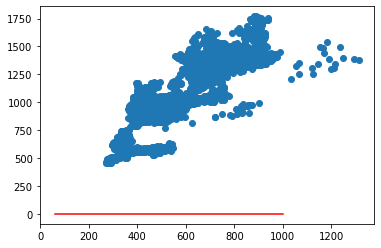

In [35]:
#регрессия на графике
X0 = np.linspace(60, 1000, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

error after gradient descent: 120352781.88745798


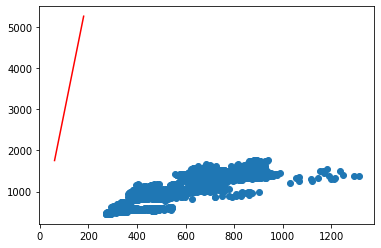

In [36]:
#запуск градиентного спуска
hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)


X0 = np.linspace(60, 180, 10)
Y0 = hyp.predict(X0)


plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

error after gradient descent: 27063448885.83458


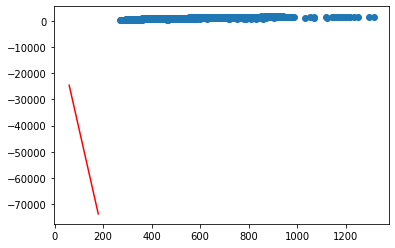

In [37]:
#запуск градиентного спуска
hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)


X0 = np.linspace(60, 180, 10)
Y0 = hyp.predict(X0)


plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Численное значение ошибки значительно уменьшилось. Линия на графике существенно приблизилось к точкам. Конечно, модель еще далека от совершенства. Это лишь одна итерация градиентного спуска. Необходимо модифицировать метод так, чтобы он запускался в цикле пока ошибка не перестанет меняться существенно:

In [38]:
class hypothesis(object):
#Модель парной линейной регрессии
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
#определение конструктора класса, который запоминает в полях экземпляра параметры регрессии.


#метод, который принимает значение входной переменной и возвращает теор значение выходной - это прямое действие регрессии
#метод предсказания результата по факторам (в случае парной регрессии - по одному фактору):
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    
#функция ошибки
#среднеквадратическое отклонение, 
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X))



    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step<max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = abs(old_err - new_err)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

#расширена функциональность этого метода так, чтобы он возвращал массив ошибок на каждой итерации спуска и номер итерации

In [39]:
#Запуск градиентного спуска
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 13421.793198857391


Теперь ошибка снизилась гораздо больше. Однако, она все еще не достигла нуля. Нулевая ошибка не всегда возможна в принципе из-за того, что точки данных не всегда будут располагаться на одной линии. Нужно стремиться не к нулевой, а к минимально возможной ошибке.

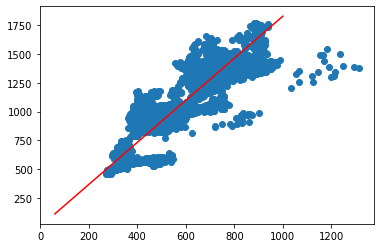

In [40]:
#регрессия на графике:
X0 = np.linspace(60, 1000, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Значительно лучше. Линия регрессии довольно похожа на оптимальную. Так ли это на самом деле, глядя на график, сказать сложно, для этого нужно проанализировать, как ошибка регрессии менялась со временем

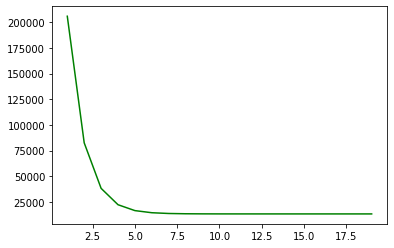

In [41]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

На графике наглядно видно, что в начале обучения ошибка падала быстро, но в ходе градиентного спуска она вышла на плато. Учитывая, что используется гладкая функция ошибки второго порядка, это свидетельствует о том, что достигнут локальный минимум и дальнейшее повторение алгоритма не принесет улучшения модели.

In [42]:
print('размеры: ', len(x_1.index), len(y_1.index))

размеры:  3795 3795


Метод k ближайших соседей

In [43]:
start_time = time.time()
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_1_train, y_1_train)
knn_pred = knn.predict(x_1_test)
#точность модели на тестовой выборке
print(knn.score(x_1_test,y_1_test))
tm = time.time()-start_time
print("Время выполнения", tm)
MSE = mean_squared_error(y_1_test, knn_pred)
print("Среднеквадратичная ошибка (MSE):", MSE)

0.9766167197120053
Время выполнения 0.025695085525512695
Среднеквадратичная ошибка (MSE): 670.5298089591568


In [44]:
start_time = time.time()
knn2 = KNeighborsRegressor(n_neighbors=10)
knn2.fit(x_1_train, y_1_train)
knn2_pred = knn2.predict(x_1_test)
#точность модели на тестовой выборке
print(knn2.score(x_1_test, y_1_test))
tm = time.time()-start_time
print("Время выполнения", tm)
MSE = mean_squared_error(y_1_test, knn2_pred)
print("Среднеквадратичная ошибка (MSE):", MSE)

0.9670212412356264
Время выполнения 0.06778979301452637
Среднеквадратичная ошибка (MSE): 945.6860004940712


In [45]:
start_time = time.time()
knn3 = KNeighborsRegressor(n_neighbors=4)
knn3.fit(x_1_train, y_1_train)
knn3_pred = knn3.predict(x_1_test)
#точность модели на тестовой выборке
print(knn3.score(x_1_test, y_1_test))
tm = time.time()-start_time
print("Время выполнения", tm)
MSE = mean_squared_error(y_1_test, knn3_pred)
print("Среднеквадратичная ошибка (MSE):", MSE)

0.9771604070012387
Время выполнения 0.03913378715515137
Среднеквадратичная ошибка (MSE): 654.9392446887351


In [46]:
best_model_knn = knn3
best_result_knn = knn3.score(x_1_test, y_1_test)
best_mse_knn = MSE
best_time_knn = tm

Дерево решений

In [47]:
best_model_tree = None
best_result_tree = 0 
best_mse_tree = 1000000 
best_time_tree = 0
best_depth_tree = 0    

for depth in range(1, 11):
    start_time = time.time()
    model_tree = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    model_tree.fit(x_1_train, y_1_train)
    predication_tree = model_tree.predict(x_1_test)
    result = model_tree.score(x_1_test, y_1_test)
    tm = time.time()-start_time
    if result > best_result_tree: 
        best_model_tree = model_tree
        best_result_tree = result
        best_depth_tree = depth
        best_time_tree = tm
        best_mse_tree = mean_squared_error(y_1_test, predication_tree)        

print("Точность лучшей модели:", best_result_tree, "Глубина дерева:", best_depth_tree, 'Среднеквадратичная ошибка (MSE)', best_mse_tree, 'Время выполнения', best_time_tree)

Точность лучшей модели: 0.9598655243596518 Глубина дерева: 10 Среднеквадратичная ошибка (MSE) 1150.8805416669927 Время выполнения 0.05263090133666992


Случайный лес

In [48]:
best_model_forest = None
best_result_forest = 0 
best_mse_forest = 1000000 
best_time_forest = 0
best_depth_forest = 0  


for est in range(10, 51, 5):
    for depth in range(1, 11):
        start_time = time.time()
        model_forest = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(x_1_train, y_1_train)
        predication_forest = model_forest.predict(x_1_test)
        result = model_forest.score(x_1_test, y_1_test)
        tm = time.time()-start_time
        if result > best_result_forest:
            best_model_forest = model_forest
            best_result_forest = result
            best_est_forest = est
            best_depth_forest = depth
            best_time_forest = tm
            best_mse_forest = mean_squared_error(y_1_test, predication_tree)
            
print("Точность лучшей модели:", best_result_forest, "Максимальная глубина:", best_depth_forest, "Количество деревьев:", best_est_forest, 'Среднеквадратичная ошибка (MSE)', best_mse_forest, 'Время выполнения', best_time_forest)
                   



Точность лучшей модели: 0.9785167028506524 Максимальная глубина: 10 Количество деревьев: 50 Среднеквадратичная ошибка (MSE) 1150.8805416669927 Время выполнения 1.0868728160858154


Ридж-регрессия

In [49]:
start_time = time.time()
ridge_regression = Ridge(alpha=0.1)  # alpha — величина регуляризации
# обучение
ridge_regression.fit(x_1_train, y_1_train)
# предсказание результата
ridge_pred = ridge_regression.predict(x_1_test)
#точность модели на тестовой выборке
print(ridge_regression.score(x_1_test, y_1_test))
tm = time.time()-start_time
print("Время выполнения", tm)
MSE = mean_squared_error(y_1_test, ridge_pred)
print("Среднеквадратичная ошибка (MSE):", MSE)

0.8743693124396169
Время выполнения 0.0746450424194336
Среднеквадратичная ошибка (MSE): 3602.5365086403344


In [50]:
best_model_ridge = ridge_regression
best_result_ridge = ridge_regression.score(x_1_test, y_1_test)
best_mse_ridge = MSE
best_time_ridge = tm

Лассо-регрессия

In [51]:
start_time = time.time()
Lasso_regression = LassoCV()
# обучение
Lasso_regression.fit(x_1_train, y_1_train)
# предсказание результата
Lasso_pred = Lasso_regression.predict(x_1_test)
#точность модели на тестовой выборке
print(Lasso_regression.score(x_1_test, y_1_test))
tm = time.time()-start_time
print("Время выполнения", tm)
MSE = mean_squared_error(y_1_test, Lasso_pred)
print("Среднеквадратичная ошибка (MSE):", MSE)

0.8638799507998244
Время выполнения 0.14039373397827148
Среднеквадратичная ошибка (MSE): 3903.3253445011774


D:\Python\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [52]:
best_model_Lasso = Lasso_regression
best_result_Lasso = Lasso_regression.score(x_1_test, y_1_test)
best_mse_Lasso = MSE
best_time_Lasso = tm

ElasticNetCV

In [53]:
start_time = time.time()
Elastic_regression = ElasticNetCV()
# обучение
Elastic_regression.fit(x_1_train, y_1_train)
# предсказание результата
Elastic_pred = Elastic_regression.predict(x_1_test)
#точность модели на тестовой выборке
print(Elastic_regression.score(x_1_test, y_1_test))
tm = time.time()-start_time
print("Время выполнения", tm)
MSE = mean_squared_error(y_1_test, Elastic_pred)
print("Среднеквадратичная ошибка (MSE):", MSE)

0.8638299445471915
Время выполнения 0.09482502937316895
Среднеквадратичная ошибка (MSE): 3904.7593042626645


D:\Python\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [54]:
best_model_Elastic = Elastic_regression
best_result_Elastic = Elastic_regression.score(x_1_test, y_1_test)
best_mse_Elastic = MSE
best_time_Elastic = tm

Таблица моделей 

In [55]:
# Создание списка моделей для проверки
model_list = [best_model_reg, best_model_knn, best_model_tree, best_model_forest, best_model_ridge, best_model_Lasso, best_model_Elastic]
result_list = [best_result_reg, best_result_knn, best_result_tree, best_result_forest, best_result_ridge, best_result_Lasso, best_result_Elastic]
mse_list = [best_mse_reg, best_mse_knn, best_mse_tree, best_mse_forest, best_mse_ridge, best_mse_Lasso, best_mse_Elastic]
time_list = [best_time_reg, best_time_knn, best_time_tree, best_time_forest, best_time_ridge, best_time_Lasso, best_time_Elastic]

result_model = pd.DataFrame({
    'indicanor': ['Линейная', 'Соседи', 'Дерево', 'Лес', 'Ридж', 'Лассо', 'Elastic'],
    'model': model_list, 
    'score': result_list,
    'MSE': mse_list,
    'Time': time_list
})

display(result_model)

indicanor                                              model     score  \
0  Линейная  LinearRegression(copy_X=True, fit_intercept=Tr...  0.874370   
1    Соседи  KNeighborsRegressor(algorithm='auto', leaf_siz...  0.977160   
2    Дерево  DecisionTreeRegressor(criterion='mse', max_dep...  0.959866   
3       Лес  (DecisionTreeRegressor(criterion='mse', max_de...  0.978517   
4      Ридж  Ridge(alpha=0.1, copy_X=True, fit_intercept=Tr...  0.874369   
5     Лассо  LassoCV(alphas=None, copy_X=True, cv='warn', e...  0.863880   
6   Elastic  ElasticNetCV(alphas=None, copy_X=True, cv='war...  0.863830   

           MSE      Time  
0  3602.510400  0.059853  
1   654.939245  0.039134  
2  1150.880542  0.052631  
3  1150.880542  1.086873  
4  3602.536509  0.074645  
5  3903.325345  0.140394  
6  3904.759304  0.094825

Лучшая модель по точности - Лес, но по времени и ошибке гораздо лучше Соседи. 
Поэтому предскажу по ней

In [56]:
#сравню значения предсказанных и реальных
B = pd.DataFrame({'Actual': y_1_test, 'Predicted': np.around(knn3_pred)})
T = B.head(25)
T

Actual  Predicted
6573  444.00      444.0
3028  340.00      345.0
3248  482.25      464.0
6830  431.25      473.0
5275  763.50      785.0
3975  607.50      580.0
5320  723.00      718.0
2868  333.50      345.0
4399  710.25      718.0
2441  340.00      344.0
5627  485.00      440.0
4984  775.00      792.0
5101  690.25      700.0
6962  468.00      467.0
2358  346.25      348.0
2241  390.00      392.0
2248  380.75      398.0
2525  342.00      342.0
5937  406.25      408.0
6696  380.00      379.0
4646  725.00      722.0
7013  543.75      551.0
4531  931.00      928.0
2954  325.75      335.0
4448  940.00      918.0

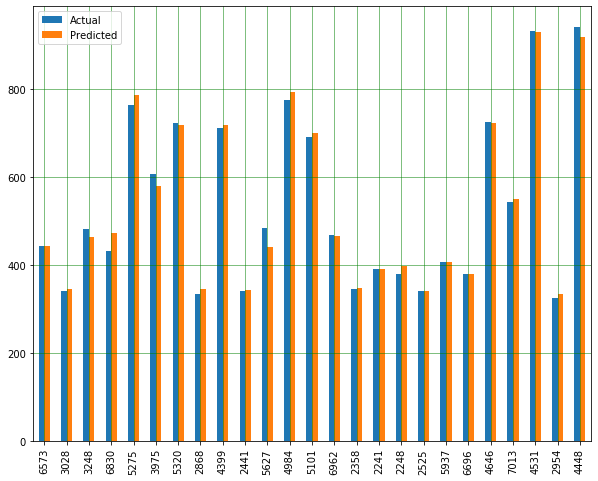

In [57]:
T.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [86]:
acc_plt_act = np.zeros(759)

i = 0

for item in y_1_test:
    #print(item)
    acc_plt_act[i] = item
    i += 1
    
acc_plt_pred = np.zeros(759)

i = 0

for item in np.around(knn3_pred):
    #print(item)
    acc_plt_pred[i] = item
    i += 1
    
acc_plt_diff = acc_plt_act - acc_plt_pred
acc_plt_diff

array([   0.  ,   -5.  ,   18.25,  -41.75,  -21.5 ,   27.5 ,    5.  ,
        -11.5 ,   -7.75,   -4.  ,   45.  ,  -17.  ,   -9.75,    1.  ,
         -1.75,   -2.  ,  -17.25,    0.  ,   -1.75,    1.  ,    3.  ,
         -7.25,    3.  ,   -9.25,   22.  ,    4.75,    5.75,   -6.75,
         -4.5 ,  -13.25,  -10.  ,    3.  ,   -4.5 ,   -0.25,   -8.5 ,
          3.  ,  -13.  ,  -59.  ,   -3.  ,   -4.  ,    2.25,   12.75,
         -4.75,   -5.  ,   -1.5 ,   -2.25,   -4.  ,    4.  ,    0.75,
          2.25,   -7.  ,   -5.  ,    5.25,   -4.25,   12.  ,   12.25,
        -21.  ,   -4.  ,   20.25,    0.5 ,    4.25,    7.25,  -12.5 ,
         -1.  ,  -11.75,   -3.75,    1.75,  -15.  ,    3.  ,  -12.5 ,
          0.75,  -17.  ,    0.  ,   16.25,    2.5 ,    5.25,    5.  ,
         -0.5 ,  -20.  ,   -3.  ,  -11.75,   -6.  ,    9.25,   10.  ,
        -10.5 ,    5.  ,  -20.75,    9.25,    8.25,   44.75,    4.75,
        -21.75,   -0.5 ,    0.25,   14.  ,   -8.5 ,  -17.5 ,   -5.  ,
        -19.25,   -3

In [94]:
fp, residuals, rank, sv, rcond = np.polyfit(acc_plt_act, acc_plt_diff, 1, full=True)
f = np.poly1d(fp)

xlin = np.linspace(200, 1200, 1000)

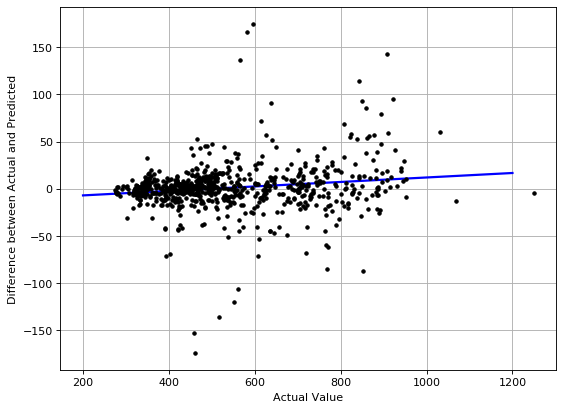

In [96]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

plt.xlabel("Actual Value")
plt.ylabel("Difference between Actual and Predicted")
plt.grid()

plt.errorbar(acc_plt_act, acc_plt_diff, fmt = '.', linewidth=0, color = 'black')
plt.plot(xlin, f(xlin), linewidth=2, color = 'blue')
plt.show()

In [97]:
#выведем параметры линии тренда в формате коэффициент наклона, константа 
f

poly1d([  0.02373097, -11.72197203])